# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Context:

A large e-commerce company has contracted us to provide delivery services from several of their warehouses(or sites) to customers' doorsteps at several locations across the country.

The dataset contains information about the performance of our delivery agents working at our client's sites across cities in India.

The idea of this exercise is to gain insights into their performance and make data driven strategic recommendations for imporvement.

***NOTE: The dataset contains information for only one month, i.e June 2023***

# Features in the Dataset
* Site Code - A unique ID belonging to the site at which our delivery agents work.
* City - Name of the city in which the site is located.
* Vehicle Type - "Van DCD" means the delivery agent drives his own van and delivers packages. "Bike" means the delivery agent rides his own bike and delivers packages. "Van D+DA" means the delivery agent doesn't drive, but is instead driven around the city by a van driver.
* Cluster - Cities are grouped into clusters based on certain characteristics.
* Date - The date that the delivery agent reported for work.
* Delivery Agent ID - A unique identifier assigned to each delivery agent who works with us.
* Shift - "A" indicates morning, "B" indicates afternoon, "C" indicates evening.
* Unsuccessful_Attempts - The number of packages that the delivery agent attempted to deliver, but the delivery was not possible for various reasons
* Process_Deviations - The number of times the delivery agent deviated from the process during the shift.
* Delivered - The number of packages that the delivery agent delivered during the shift.
* Customer_Rejects - The number of packages that customers rejected when the delivery agent went to deliver them.
* Picked_up_Customer_Returns - The number of packages the delivery agent picked up from customers who wanted to return something that they had ordered earlier.
* Picked_up_Seller - The number of packages that the delivery agent picked up from sellers on the platform. These packages would be sent out for delivery to customers the next day.
* billing_amt - The amount that we bill our clients for the services rendered by our delivery agents.


# Question 1

Load the dataset into a dataframe and name it "daily_df". Display a sample of 10 random rows, display the shape of the dataset, the datatypes of each column, and check for missing values.

In [2]:
# Loading the dataset using the .read_csv function in python

daily_df = pd.read_csv("warehouse_delivery.csv")

In [3]:
# Reading the first 10 rows of the dataset

daily_df.head(10)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Unnamed: 14,Unnamed: 15
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27 00:00:00,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,NaN,NaN
1,Site_10,BANGALORE,Van DCD,4.0,2023-06-08 00:00:00,DA_273,A,0.0,9.0,60.0,1.0,20.0,0.0,2075.0,NaN,NaN
2,Site_3,BANGALORE,Bike,4.0,2023-06-25 00:00:00,DA_370,C,2.0,0.0,15.0,0.0,2.0,0.0,571.0,NaN,NaN
3,Site_10,BANGALORE,Van DCD,4.0,2023-06-22 00:00:00,DA_118,B,1.0,0.0,15.0,0.0,0.0,0.0,1275.0,NaN,NaN
4,Site_4,BANGALORE,Van DCD,4.0,2023-06-11 00:00:00,DA_136,B,5.0,0.0,40.0,1.0,0.0,0.0,1353.0,NaN,NaN
5,Site_3,BANGALORE,Van DCD,4.0,2023-06-24 00:00:00,DA_36,B,0.0,0.0,22.0,0.0,0.0,0.0,1429.0,NaN,NaN
6,Site_19,HYDERABAD,Bike,4.0,2023-06-05 00:00:00,DA_295,C,2.0,0.0,29.0,0.0,2.0,0.0,613.0,NaN,NaN
7,Site_27,MUMBAI,Bike,3.0,2023-06-08 00:00:00,DA_224,A,2.0,0.0,13.0,0.0,31.0,0.0,933.0,NaN,NaN
8,Site_23,CHENNAI,Bike,3.0,2023-06-23 00:00:00,DA_686,A,0.0,0.0,0.0,0.0,31.0,0.0,907.0,NaN,NaN
9,Site_16,BANGALORE,Bike,4.0,2023-06-23 00:00:00,DA_569,B,3.0,0.0,34.0,0.0,2.0,0.0,772.0,NaN,NaN


In [4]:
# Displaying the shape of the dataset using the .shape function in python

daily_df.shape

(12279, 16)

Here we find that our dataset has 16 columns and 12279 rows

In [5]:
# Checking the datatypes of all the columns of the dataframe.

daily_df.dtypes

Site Code                      object
city                           object
Vehicle_type                   object
cluster                       float64
Date                           object
Delivery Agent ID              object
Shift                          object
Unsuccessful_Attempts         float64
Process_Deviations            float64
Delivered                     float64
Customer_Rejects              float64
Picked_up_Customer_Returns    float64
Picked up_Seller              float64
billing_amt                   float64
Unnamed: 14                   float64
Unnamed: 15                   float64
dtype: object

In our dataset we can find that the columns 14 and 15 are Unnnamed.

The date column has an incorrect datatype that needs to be replaced and some other columns as well that has incorrect datatype and all needs to be replaced with the correct one.

- Incorrect Data Types:

    - Clean certain values
    - Clean and convert an entire column

In [6]:
daily_df['Date'] = pd.to_datetime(daily_df['Date'])

In [7]:
daily_df.Shift.dtype

dtype('O')

In [8]:
daily_df.Shift.astype(str)

0          A
1          A
2          C
3          B
4          B
        ... 
12274    nan
12275    nan
12276    nan
12277    nan
12278    nan
Name: Shift, Length: 12279, dtype: object

In [9]:
daily_df['Shift'] = daily_df['Shift'].astype(str)

In [10]:
# Recheck the datatype
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279 entries, 0 to 12278
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Site Code                   11279 non-null  object        
 1   city                        11279 non-null  object        
 2   Vehicle_type                11279 non-null  object        
 3   cluster                     11279 non-null  float64       
 4   Date                        11279 non-null  datetime64[ns]
 5   Delivery Agent ID           11279 non-null  object        
 6   Shift                       12279 non-null  object        
 7   Unsuccessful_Attempts       11279 non-null  float64       
 8   Process_Deviations          11279 non-null  float64       
 9   Delivered                   11279 non-null  float64       
 10  Customer_Rejects            11279 non-null  float64       
 11  Picked_up_Customer_Returns  11279 non-null  float64   

In [11]:
# Drop unwanted columns

daily_df.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)

In [12]:
# Check the count of all the null values in the column

daily_df.isnull().sum()

Site Code                     1000
city                          1000
Vehicle_type                  1000
cluster                       1000
Date                          1000
Delivery Agent ID             1000
Shift                            0
Unsuccessful_Attempts         1000
Process_Deviations            1000
Delivered                     1000
Customer_Rejects              1000
Picked_up_Customer_Returns    1000
Picked up_Seller              1000
billing_amt                   1000
dtype: int64

##### Missing values


- For Missing Values: Some common techniques to treat this issue are

     - Dropping the rows containing the missing values
     - Imputing the missing values
     - Keep the missing values if they don't affect the analysis

In [13]:
# Use the describe function to understand the mean, median, mode and standard deviations.

daily_df.describe(include='all')

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt
count,11279,11279,11279,11279.000000,11279,11279,12279,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.0,11279.000000
unique,30,8,3,NaN,30,696,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Site_22,BANGALORE,Bike,NaN,2023-06-06 00:00:00,DA_34,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1143,4928,6007,NaN,402,28,5129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2023-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2023-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.038213,NaN,NaN,NaN,2.593404,1.583474,34.036971,1.378757,10.170228,0.0,1257.684103
std,NaN,NaN,NaN,0.948979,NaN,NaN,NaN,2.879863,6.854252,31.495358,2.937879,15.151979,0.0,612.346733
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,126.000000
25%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,0.000000,16.000000,0.000000,0.000000,0.0,622.000000


In [14]:
# Replace NaN with appropriate strategy e.g., mean or median

daily_df.fillna(value={'Site Code': 'Site_22', 'city': 'BANGALORE', 'Vehicle_type': 'Bike', 'cluster': 4,
                       'Date': '2023-06-06 00:00:00', 'Delivery Agent ID': 'DA_34', 'Shift': 'A', 'Unsuccessful_Attempts': 0,
                      'Process_Deviations': 0, 'Delivered': 0, 'Customer_Rejects':0, 'Picked_up_Customer_Returns':0,
                      'Picked up_Seller': 0, 'billing_amt': 0},
                inplace=True)

# Question 2

**Part-A**

You will notice that there are delivery agents who have used different vehicle types in different shifts.

Find what vehicle type was used for majority of the shifts, then overwrite all the other minority values with the majority values.

For example - if DA_1 used a bike in 20 shifts and used a van in 2 shifts, you need to make sure that the "Vehicle Type" for all 22 shifts is set to "Bike" as that was used for majority of the shifts.

In [15]:
# Get the unique values

daily_df['Vehicle_type'].value_counts()

Bike        7007
Van DCD     3670
Van D+DA    1602
Name: Vehicle_type, dtype: int64

Here, we can see that the Vehicle_type 'Bike' has been used most for the deliveries by most of the delivery agents.

In [16]:
# Imputed the missing values of the 'Vehicle_type' column with the majority values

daily_df['Vehicle_type'] = daily_df['Vehicle_type'].fillna(daily_df['Vehicle_type'].mode()[0])

In [17]:
daily_df['Vehicle_type'].isnull().sum()

0

In [18]:
# Rechecking the count of values again

daily_df['Vehicle_type'].value_counts()

Bike        7007
Van DCD     3670
Van D+DA    1602
Name: Vehicle_type, dtype: int64

Hence, checking on the null values again, we can see that there are no null values in the 'Vehicle_type' column.


**Part-B:**

Total assigned packages can be calculated using the following formula:

Total Assigned = Unsuccessful_Attempts + Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller

Use this formula and add a new column in the dataframe called "Total Assigned"

In [19]:
# To find the total assigned packages, we use the formula above:

daily_df['Total Assigned'] = daily_df['Unsuccessful_Attempts'] + daily_df['Delivered'] + daily_df['Customer_Rejects'] + daily_df['Picked_up_Customer_Returns'] + daily_df['Picked up_Seller']

In [20]:
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0
1,Site_10,BANGALORE,Van DCD,4.0,2023-06-08,DA_273,A,0.0,9.0,60.0,1.0,20.0,0.0,2075.0,81.0
2,Site_3,BANGALORE,Bike,4.0,2023-06-25,DA_370,C,2.0,0.0,15.0,0.0,2.0,0.0,571.0,19.0
3,Site_10,BANGALORE,Van DCD,4.0,2023-06-22,DA_118,B,1.0,0.0,15.0,0.0,0.0,0.0,1275.0,16.0
4,Site_4,BANGALORE,Van DCD,4.0,2023-06-11,DA_136,B,5.0,0.0,40.0,1.0,0.0,0.0,1353.0,46.0


**Part-C:**

"Productivity" is a metric that aims at measuring how much work a delivery agent is doing during his shift. This can later be compared with the rest of the workforce to identify delivery agents who are both - outperforming as well as under performing.  

It can be calculated using the following formula:

Productivity = Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller.

Calculate "Productivity" and show it in a new column in the daily_df.


In [21]:
# To find the productivity status of the delivery agents, we use the formula stated above:

daily_df['Productivity'] = daily_df['Delivered'] + daily_df['Customer_Rejects'] + daily_df['Picked_up_Customer_Returns'] + daily_df['Picked up_Seller']

In [22]:
daily_df

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0,30.0
1,Site_10,BANGALORE,Van DCD,4.0,2023-06-08,DA_273,A,0.0,9.0,60.0,1.0,20.0,0.0,2075.0,81.0,81.0
2,Site_3,BANGALORE,Bike,4.0,2023-06-25,DA_370,C,2.0,0.0,15.0,0.0,2.0,0.0,571.0,19.0,17.0
3,Site_10,BANGALORE,Van DCD,4.0,2023-06-22,DA_118,B,1.0,0.0,15.0,0.0,0.0,0.0,1275.0,16.0,15.0
4,Site_4,BANGALORE,Van DCD,4.0,2023-06-11,DA_136,B,5.0,0.0,40.0,1.0,0.0,0.0,1353.0,46.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12275,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12276,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12277,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Part-D:**

Analyze the data and report the ranges of productivity that different vehicle types have in different types of shifts.

In [23]:
# Analyzing the productivity_ranges for different vehicle types in different shifts

productivity_ranges = daily_df.groupby(['Vehicle_type', 'Shift'])['Total Assigned'].describe()

In [24]:
# Report of the above analysis

print(productivity_ranges)

                     count       mean        std   min    25%   50%    75%  \
Vehicle_type Shift                                                           
Bike         A      2313.0  45.126243  11.777551  20.0  37.00  44.0  52.00   
             B       809.0  36.761434   9.410664  18.0  30.00  36.0  43.00   
             C      2885.0  25.054766   6.697427   1.0  21.00  25.0  29.00   
             nan    1000.0   0.000000   0.000000   0.0   0.00   0.0   0.00   
Van D+DA     A       799.0  83.185232  14.754914  31.0  74.00  83.0  95.00   
             B       802.0  40.779302  10.039618  16.0  34.00  40.0  47.00   
             C         1.0  40.000000        NaN  40.0  40.00  40.0  40.00   
Van DCD      A      2017.0  90.088250  43.460278   1.0  67.00  81.0  93.00   
             B      1651.0  33.888552  14.973178   1.0  25.00  30.0  38.00   
             C         2.0  73.500000  37.476659  47.0  60.25  73.5  86.75   

                      max  
Vehicle_type Shift         
Bike   

The script prints the summarized statistics, giving insights into the productivity ranges for different vehicle types in different shifts.

***Explain briefly what you have observed about the productivity of different vehicles in different shifts***

**Observation:**

The dataset on different vehicles (e.g., Bike, Van D+DA, Van DCD) operating in three different shifts ie., A, B, C (morning, afternoon, and evening), the output will show statistical summaries of the Total Assigned Packages for each of the combination of vehicle and shifts type.

This allows us to observe the trends, variations, and potential insights into the productivity patterns of different vehicles during different shifts.

By the above analysis we can understand that the productivity of the delivery partners using 'Bike' and 'Van DCD' as their Vehicle_type in the morning shift is better as compared to the other shifts whereas the productivity of delivery partners using 'Van D + DA' in the afternoon shift is better.

**Part E:**

Low productivity adversely affects both - service levels as well as unit level economics of the business. Curbing this is quintessential to running a good operation.

Now that you have a sense of the productivity levels of different vehicle types in each shift, use this information to formulate logic to classify all the samples across all shifts as either "productivity-ok" or "productivity-low". Add this information into a column called "Productivity Category".

* Keep in mind that the productivity of one vehicle type is not comparable to the other. A bike may travel faster when there is more traffic. A van may be able to carry a much larger number of packages, etc...

* Keep in mind that productivity from Shift A is not comparable to productivity from Shifts B or C or vice versa. Each shift should have it's own threshold for defining low productivity.

* Most importantly, keep in mind that the ideal solution would be to identify a smaller set of people who contribute to the largest part of the problem.

* You are not being given any specific formula here to do this. You will need to think creatively and come up with an appropriate method.

In [25]:
# Find the mode of the total assigned packages, to understand the frequently occurring values in the dataset.

mode_total_assigned_packages = daily_df['Total Assigned'].mode()

In [26]:
# Analyze data and report ranges of productivity for different vehicle types in different shifts
productivity_ranges =  daily_df.groupby(['Vehicle_type', 'Shift'])['Total Assigned'].describe()

In [27]:
# Set the thresholds for 'low' productivity based on percentiles

low_thresholds = daily_df['Total Assigned'].quantile(0.25)

In [28]:
# Classify the samples as 'productivity-ok' or 'productivity-low'

daily_df['Productivity Category'] = 'productivity-ok'     # Initialize with 'OK'
daily_df.loc[daily_df['Total Assigned'] < low_thresholds, 'Productivity Category'] = 'productivity-low'     # Initialize with 'LOW'

To classify the samples into 'ok' or 'low' productivity categories, considering the non-compatibility of different vehicle types and shifts, we set the thresholds based on our analysis.

In [29]:
daily_df

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,Productivity Category
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0,30.0,productivity-ok
1,Site_10,BANGALORE,Van DCD,4.0,2023-06-08,DA_273,A,0.0,9.0,60.0,1.0,20.0,0.0,2075.0,81.0,81.0,productivity-ok
2,Site_3,BANGALORE,Bike,4.0,2023-06-25,DA_370,C,2.0,0.0,15.0,0.0,2.0,0.0,571.0,19.0,17.0,productivity-low
3,Site_10,BANGALORE,Van DCD,4.0,2023-06-22,DA_118,B,1.0,0.0,15.0,0.0,0.0,0.0,1275.0,16.0,15.0,productivity-low
4,Site_4,BANGALORE,Van DCD,4.0,2023-06-11,DA_136,B,5.0,0.0,40.0,1.0,0.0,0.0,1353.0,46.0,41.0,productivity-ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,productivity-low
12275,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,productivity-low
12276,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,productivity-low
12277,Site_22,BANGALORE,Bike,4.0,2023-06-06,DA_34,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,productivity-low


***Explain briefly the logic you have used to solve the question above***

In the above code, the Productivity Category is added to the Dataframe, indicating whether each sample is classified as 'Ok' or 'low'.

The approach aims to differentiate productivity categories based on statistical insights from the data.

The 'low' category is determined relative to the distribution of 'Total Assigned' Packages within each vehicle type and Shift, ensuring that the productivity is evaluated in a context-specific manner.

In [30]:
daily_df.head(1)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,Productivity Category
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0,30.0,productivity-ok


In [31]:
agent_id = 'Delivery Agent ID'

In [32]:
# Filtering the dataframe for specific delivery person

agent_data = daily_df[daily_df['Delivery Agent ID'] == agent_id]

In [33]:
# Count the number of shifts worked by the delivery person

shift_count = agent_data['Shift'].value_counts()

In [34]:
# Creating a new column 'No. od Shifts Worked'

daily_df['No. of Shifts Worked'] = daily_df.groupby('Delivery Agent ID')['Shift'].transform('count')

In [35]:
daily_df.head(10)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,Productivity Category,No. of Shifts Worked
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0,30.0,productivity-ok,24
1,Site_10,BANGALORE,Van DCD,4.0,2023-06-08,DA_273,A,0.0,9.0,60.0,1.0,20.0,0.0,2075.0,81.0,81.0,productivity-ok,25
2,Site_3,BANGALORE,Bike,4.0,2023-06-25,DA_370,C,2.0,0.0,15.0,0.0,2.0,0.0,571.0,19.0,17.0,productivity-low,24
3,Site_10,BANGALORE,Van DCD,4.0,2023-06-22,DA_118,B,1.0,0.0,15.0,0.0,0.0,0.0,1275.0,16.0,15.0,productivity-low,20
4,Site_4,BANGALORE,Van DCD,4.0,2023-06-11,DA_136,B,5.0,0.0,40.0,1.0,0.0,0.0,1353.0,46.0,41.0,productivity-ok,24
5,Site_3,BANGALORE,Van DCD,4.0,2023-06-24,DA_36,B,0.0,0.0,22.0,0.0,0.0,0.0,1429.0,22.0,22.0,productivity-low,15
6,Site_19,HYDERABAD,Bike,4.0,2023-06-05,DA_295,C,2.0,0.0,29.0,0.0,2.0,0.0,613.0,33.0,31.0,productivity-ok,26
7,Site_27,MUMBAI,Bike,3.0,2023-06-08,DA_224,A,2.0,0.0,13.0,0.0,31.0,0.0,933.0,46.0,44.0,productivity-ok,26
8,Site_23,CHENNAI,Bike,3.0,2023-06-23,DA_686,A,0.0,0.0,0.0,0.0,31.0,0.0,907.0,31.0,31.0,productivity-ok,3
9,Site_16,BANGALORE,Bike,4.0,2023-06-23,DA_569,B,3.0,0.0,34.0,0.0,2.0,0.0,772.0,39.0,36.0,productivity-ok,25


# Question 3

**Part A:**

The daily_df contains information of how each delivery agent performed on each day that they reported in June 2023. Create a new dataframe that summarizes the performance of each delivery agent for the entire month, using the data from the daily_df.

Name this new dataframe "monthly_df".

The new dataframe should contain the following columns:
* Delivery Agent ID
* Vehicle Type
* Cluster
* City
* Site Code
* No. of Shifts Worked
* Total Assigned
* Unsuccessful_Attempts
* Process_Deviations
* Productivity
* billing_amt

In [36]:
daily_df.head(1)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,Productivity Category,No. of Shifts Worked
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0,30.0,productivity-ok,24


In [37]:
# Group by 'Delivery Agent ID'

monthly_df = daily_df.groupby('Delivery Agent ID').agg({
    'Vehicle_type': lambda x: x.mode().iloc[0],
    'cluster': lambda x: x.mode().iloc[0],
    'city': lambda x: x.mode().iloc[0],
    'Site Code': lambda x: x.mode().iloc[0],
    'No. of Shifts Worked': lambda x: x.mode().iloc[0],
    'Total Assigned': lambda x: x.mode().iloc[0],
    'Unsuccessful_Attempts': lambda x: x.mode().iloc[0],
    'Process_Deviations': lambda x: x.mode().iloc[0],
    'Productivity': lambda x: x.mode().iloc[0],     # Productivity Category is categorical
    'billing_amt': lambda x: x.mode().iloc[0]
}).reset_index()

**Part B:**

"Delivery Success Rate(DSR)" is a metric that measures the quality of a delivery agent's work. If an angent has low DSR, it means that he/she would have a higher number of unsuccessful attempts.

DSR can be calculated using the following formula:

DSR = Productivity / Total Assigned.

Using this formula, calculate and add a new column called "DSR" in the monthly_df. Round the values to 2 decimal placecs.

In [38]:
# Adding a new column named 'DSR' by dividing the Productivity with the Total Assigned Packages
## to our new created dataframe 'monthly_df'.

monthly_df['DSR'] = round((monthly_df['Productivity'] / monthly_df['Total Assigned']), 2)

In [39]:
# rechecking the head of the dataframe
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR
0,DA_1,Bike,6.0,DELHI,Site_29,22,58.0,0.0,0.0,56.0,1132.0,0.97
1,DA_10,Van DCD,4.0,BANGALORE,Site_3,15,29.0,4.0,0.0,24.0,1433.0,0.83
2,DA_100,Bike,4.0,HYDERABAD,Site_19,3,32.0,0.0,0.0,32.0,959.0,1.00
3,DA_101,Van DCD,4.0,HYDERABAD,Site_19,22,71.0,4.0,0.0,69.0,2015.0,0.97
4,DA_102,Bike,4.0,HYDERABAD,Site_22,25,40.0,0.0,0.0,40.0,975.0,1.00


**Part C:**

The productivity in the monthly_df is an aggregate of the whole month's productivity. Create a new column called "Avg_Productivity" that contains the average productivity per shift of each delivery agent. The values in this column should be expressed as integers.

Do the same with Process_Deviations. Calculate the average number of deviations per shift worked and put it into a column called "Avg_Deviations". Here the values should be rounded to 2 decimal places

In [40]:
daily_df.head(1)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,Productivity Category,No. of Shifts Worked
0,Site_22,HYDERABAD,Bike,4.0,2023-06-27,DA_280,A,0.0,0.0,3.0,1.0,26.0,0.0,955.0,30.0,30.0,productivity-ok,24


In [41]:
# Calculate average productivity per shift
monthly_df['Avg_Productivity'] = round((monthly_df['Productivity'] / monthly_df['No. of Shifts Worked']), 0).astype(int)

In [42]:
# Calculate the average number of deviations per shift worked
monthly_df['Avg_Deviations'] = (monthly_df['Unsuccessful_Attempts'] / monthly_df['No. of Shifts Worked']).round(2)

In [43]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations
0,DA_1,Bike,6.0,DELHI,Site_29,22,58.0,0.0,0.0,56.0,1132.0,0.97,3,0.00
1,DA_10,Van DCD,4.0,BANGALORE,Site_3,15,29.0,4.0,0.0,24.0,1433.0,0.83,2,0.27
2,DA_100,Bike,4.0,HYDERABAD,Site_19,3,32.0,0.0,0.0,32.0,959.0,1.00,11,0.00
3,DA_101,Van DCD,4.0,HYDERABAD,Site_19,22,71.0,4.0,0.0,69.0,2015.0,0.97,3,0.18
4,DA_102,Bike,4.0,HYDERABAD,Site_22,25,40.0,0.0,0.0,40.0,975.0,1.00,2,0.00


**Part D:**

Examine the distributions of the features in the monthly_df in both forms - tabular and plotted.

All columns that contain categorical information (data that has no ordinal value) should be shown as bar graphs. All columns that contain numerical data (data with ordinal value) should be shown as distribution curves or histograms.

In [44]:
# Separating the categorical and numerical columns
cat_col = monthly_df.dtypes[monthly_df.dtypes == 'object'].index.tolist()
num_col = monthly_df.dtypes[monthly_df.dtypes != 'object'].index.tolist()

In [45]:
# Display the Categorical Columns
print(cat_col)

['Delivery Agent ID', 'Vehicle_type', 'city', 'Site Code']


In [46]:
# Display the Numeircal Columns
print(num_col)

['cluster', 'No. of Shifts Worked', 'Total Assigned', 'Unsuccessful_Attempts', 'Process_Deviations', 'Productivity', 'billing_amt', 'DSR', 'Avg_Productivity', 'Avg_Deviations']


In [47]:
# Displaying tabular summaries for categorical columns
categorical_columns = ['Vehicle_type', 'city', 'Site Code']
print("\nCategorical Column Distributions: ")
for col in categorical_columns:
    print(monthly_df[col].value_counts())


Categorical Column Distributions: 
Bike        385
Van DCD     223
Van D+DA     88
Name: Vehicle_type, dtype: int64
BANGALORE    294
HYDERABAD    143
MUMBAI       137
DELHI         70
THANE         23
BHOPAL        22
PUNE           5
CHENNAI        2
Name: city, dtype: int64
Site_22    76
Site_3     69
Site_16    60
Site_21    40
Site_12    38
Site_27    34
Site_10    33
Site_4     29
Site_5     28
Site_6     28
Site_17    27
Site_19    26
Site_18    24
Site_13    23
Site_29    19
Site_25    18
Site_2     16
Site_26    16
Site_24    14
Site_9     14
Site_7     13
Site_15    12
Site_14    11
Site_1      6
Site_28     6
Site_11     6
Site_30     5
Site_20     2
Site_23     2
Site_8      1
Name: Site Code, dtype: int64


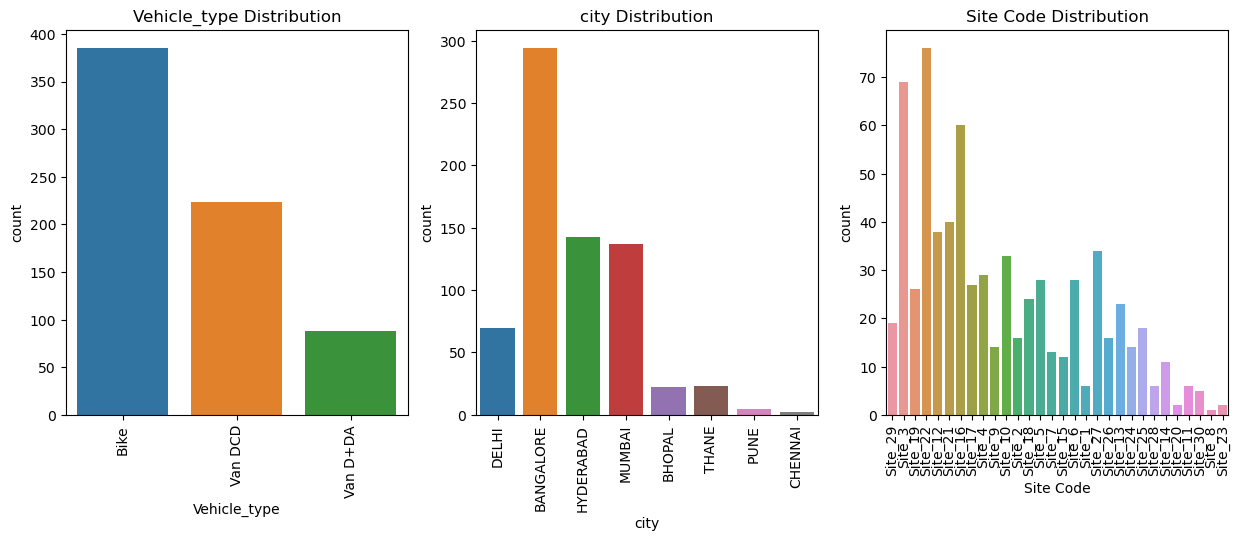

In [48]:
# Display bar graphs for categorical columns
plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(data=monthly_df, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)
plt.show()

In [49]:
# Display tabular summaries for numerical columns
numerical_columns = ['cluster', 'No. of Shifts Worked', 'Total Assigned', 'Unsuccessful_Attempts',
                     'Process_Deviations', 'Productivity', 'billing_amt', 'DSR', 'Avg_Productivity', 'Avg_Deviations']

print("\nNumerical Column Summaries: ")
print(monthly_df[numerical_columns].describe())


Numerical Column Summaries: 
          cluster  No. of Shifts Worked  Total Assigned  \
count  696.000000            696.000000      696.000000   
mean     4.041667             17.642241       39.981322   
std      0.960959             39.266364       25.201426   
min      1.000000              1.000000        0.000000   
25%      4.000000              8.000000       24.000000   
50%      4.000000             19.000000       31.000000   
75%      4.000000             24.000000       49.000000   
max      6.000000           1028.000000      259.000000   

       Unsuccessful_Attempts  Process_Deviations  Productivity  billing_amt  \
count             696.000000          696.000000    696.000000   696.000000   
mean                1.432471            0.288793     38.797414  1160.978448   
std                 1.912784            4.137380     26.168256   573.267325   
min                 0.000000            0.000000      0.000000     0.000000   
25%                 0.000000            0.0

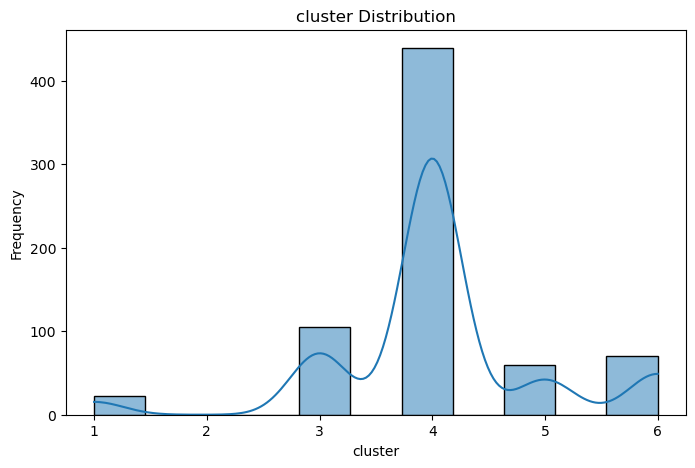

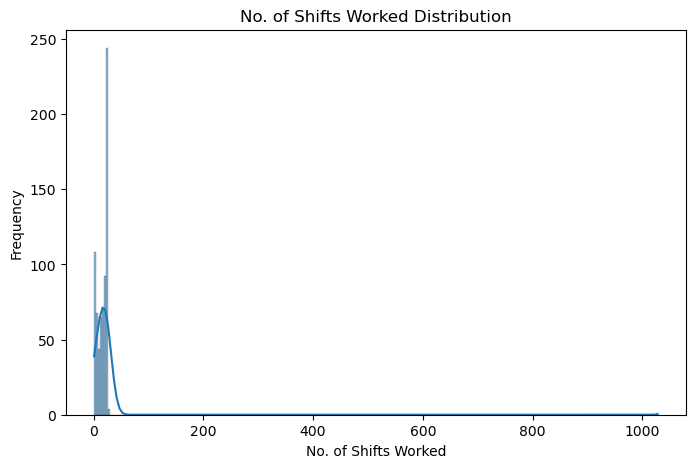

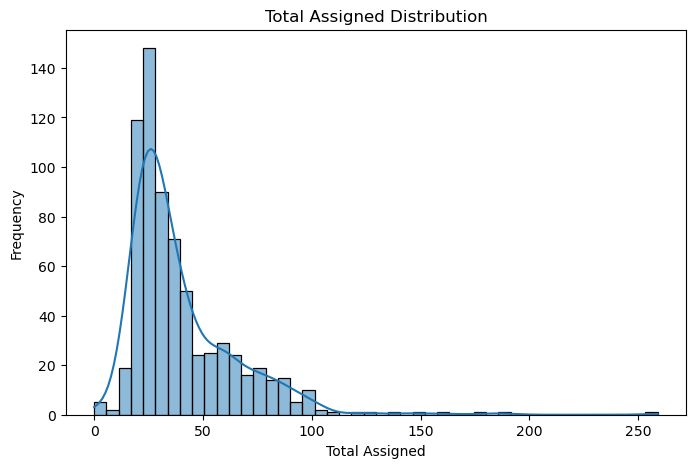

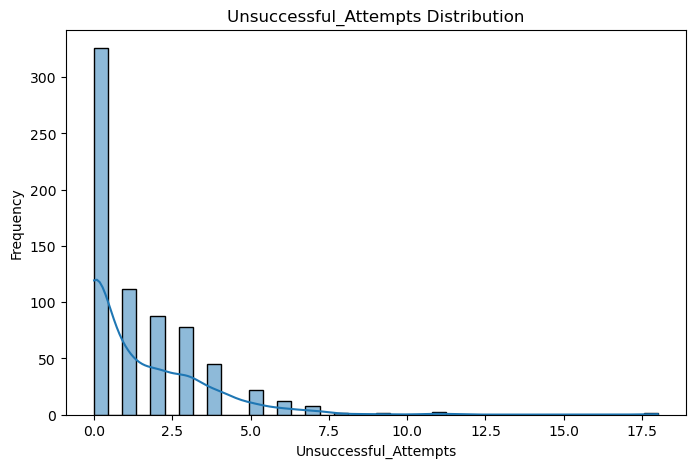

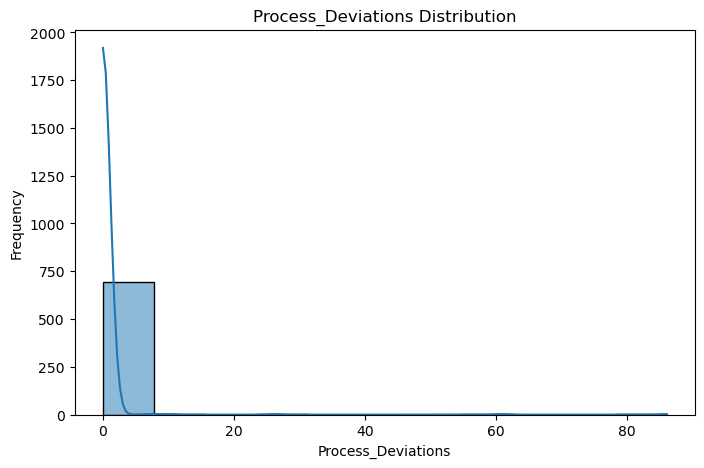

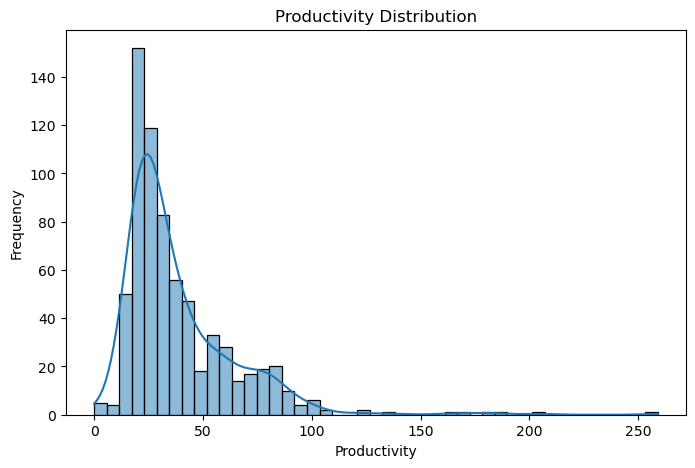

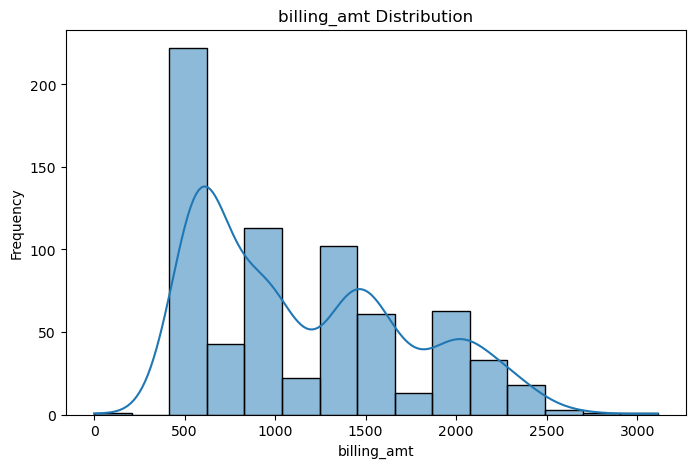

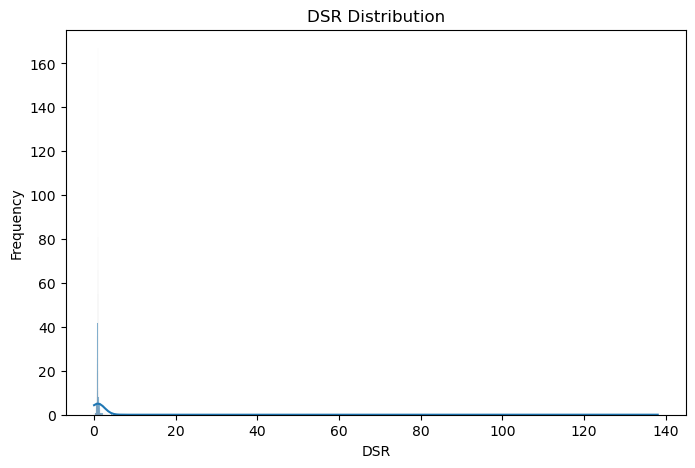

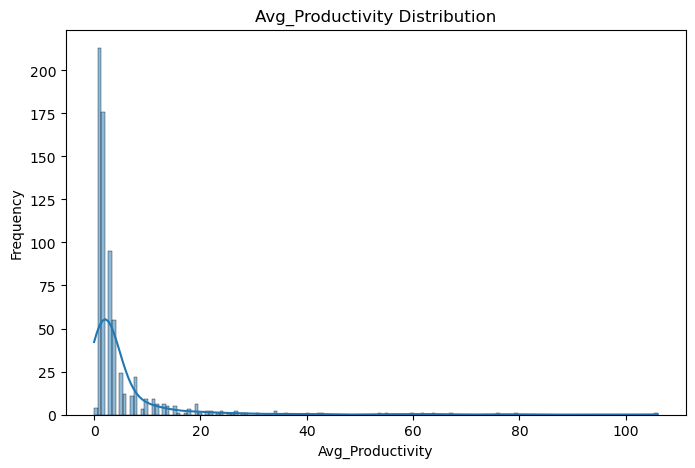

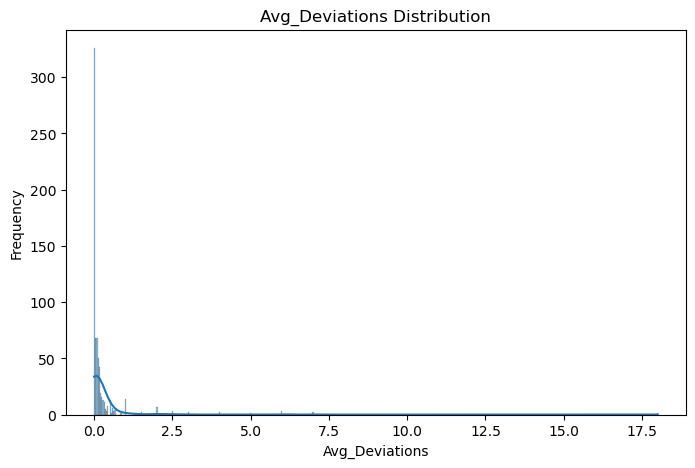

In [50]:
# Display histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=monthly_df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

***Explain briefly what you have observed about the distributions of the variables.***

There are a number of observations that comes out of the following analysis:

For Categorical Variables:

- In Vehicle_type, 'Bike' has been used for the highest number of deliveries. This means that the delivery agents frequently uses bikes over any other vehicle for deliveries.

- Looking over the City data, we find that the most number of ordered products are delivered in 'BANGALORE' followed by 'MUMBAI' & 'HYDERABAD' and 'CHENNAI' has the least number of orders placed.

- Continuing with the City data, we find that the Site Code 'Site_22' in Bangalore has the highest number of deliveries done.

For Numerical Data:

- In the 'Cluster' Distribution, the cluster number 4 is the highest.
- In the 'No. of Shifts Worked Distribution', 0-20 is the most number of delivery agents worked.
- Total Assigned number of Packages between 0-50 is the highest.
- The number of Unsuccessful Attempts is 0.
- Process Deviations had the highest frequency range 750.
- Productivity Distribution between 0-50 were the highest.
- The highest billing amount for frequent deliveries was 500.
- The Delivery Success Rate was constant for most deliveries.
- The Average Productivity Distribution was highest between 0-20 and the highest frequency crossed 200.
- The Average Deviations Distribution was highest at 0.0 and the highest frequency crossed 300.

**Part-E**

Now that you have understood the distributions of the data in the monthly_df, you need to:

1.   Classify each agent on the basis of their DSR as either "DSR-ok" or "DSR-low"
2.   Classify each agent on the basis of the number of deviations they've had as either "deviations-ok" or "deviations-high"

This classification should be represented in two new columns in the monthly_df called "DSR Category" and "Deviations Category"

Note that DSR and Deviations are comparable across all vehicle types, all shifts and all geographical areas. For example - there is no valid reason for vans in Mumbai to have lower DSR or higher deviations when compared to bikes in Hyderabad or Banagalore or Pune. The same benchmark of quality applies to all vehicle types working all shifts in all cities.  

Once again, you are not being given any explicit thresholds to use for this classification. You are expected to use your analysis to decide the thresholds.

An effective solution would be one which identifies a smaller group of people that contribute to the largest part of the problem.


In [51]:
monthly_df.head(1)

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations
0,DA_1,Bike,6.0,DELHI,Site_29,22,58.0,0.0,0.0,56.0,1132.0,0.97,3,0.0


In [52]:
monthly_df.describe()

,cluster,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,695.000000,696.000000,696.000000
mean,4.041667,17.642241,39.981322,1.432471,0.288793,38.797414,1160.978448,1.294806,4.955460,0.247011
std,0.960959,39.266364,25.201426,1.912784,4.137380,26.168256,573.267325,6.024898,9.426552,0.970037
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000
25%,4.000000,8.000000,24.000000,0.000000,0.000000,22.000000,598.000000,0.865000,1.000000,0.000000
50%,4.000000,19.000000,31.000000,1.000000,0.000000,30.000000,967.000000,0.950000,2.000000,0.040000
75%,4.000000,24.000000,49.000000,2.000000,0.000000,48.000000,1560.500000,1.000000,4.000000,0.170000
max,6.000000,1028.000000,259.000000,18.000000,86.000000,259.000000,3113.000000,138.000000,106.000000,18.000000


In [53]:
# Calculating the percentiles for DSR and Deviations

dsr_threshold = monthly_df['DSR'].quantile(0.25)
deviations_threshold = monthly_df['Avg_Deviations'].quantile(0.75)

In [54]:
# Classifying the delivery agents based on DSR

monthly_df['DSR Category'] = 'DSR-ok'
monthly_df.loc[monthly_df['DSR'] < dsr_threshold, 'DSR Category'] = 'DSR-low'

In [55]:
# Classify the delivery agents based on Deviations

monthly_df['Deviations Category'] = 'deviations-ok'
monthly_df.loc[monthly_df['Avg_Deviations'] > deviations_threshold, 'Deviations Category'] = 'deviations-high'

In [56]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category
0,DA_1,Bike,6.0,DELHI,Site_29,22,58.0,0.0,0.0,56.0,1132.0,0.97,3,0.00,DSR-ok,deviations-ok
1,DA_10,Van DCD,4.0,BANGALORE,Site_3,15,29.0,4.0,0.0,24.0,1433.0,0.83,2,0.27,DSR-low,deviations-high
2,DA_100,Bike,4.0,HYDERABAD,Site_19,3,32.0,0.0,0.0,32.0,959.0,1.00,11,0.00,DSR-ok,deviations-ok
3,DA_101,Van DCD,4.0,HYDERABAD,Site_19,22,71.0,4.0,0.0,69.0,2015.0,0.97,3,0.18,DSR-ok,deviations-high
4,DA_102,Bike,4.0,HYDERABAD,Site_22,25,40.0,0.0,0.0,40.0,975.0,1.00,2,0.00,DSR-ok,deviations-ok


***Explain briefly the logic you have used to solve the question above***

Certainly, the logic used to solve the problem statement involves classifying agents based on their DSR (Delivery Success Rate) and the number of deviations they have. The goal is to identify a smaller group of agents that contribute to a significant part of the problem.

First of all, we calculated the percentiles because percentiles are used to determine thresholds for classifying agents. For DSR, a lower percentile (i.e., 25) was chosen, indicating a threshold below which agents are considered to have a lower DSR. For deviations, a higher percentile i.e., 75 was chosen, indicating a threshold above which agents are considered to have a high number of deviations.

- Agents are classified into two categories 'ok' and 'low' based on their DSR.
- Agents with DSR below the chosen percentile threshold are classified as 'low', indicating a lower success rate in delivering assigned packages.

- Agents are classified into two categories, 'ok' and 'high', based on the number of deviations.
- Agents with a number of deviations above the chosen percentile threshold are classified as 'high', indicating a higher number of deviations from the standard process during their shifts.

The classifications are based on percentiles, allowing for a relative assessment of agents' performance compared to their peers.


By using percentiles and classifying agents ainto categories, this approach provides a way to focus on a smaller set of individuals who may need attention or improvement in their delivery performance.

# Question 4

**Part-A**

Create a new dataframe that shows the number of A, B, and C shifts each delivery agent has done in the whole month. Also include in a separate column the total number of low productivity shifts each delivery agent has had in the whole month. Call this new dataframe "shifts_df". Make sure that there are no nan values in the new dataframe.

To be more clear, the new dataframe(shifts_df) should have the following columns:

* Delivery Agent ID
* Total no. of 'A' Shifts
* Total no. of 'B' Shifts
* Total no. of 'C' Shifts
* Total no. of low productivity shifts

In [57]:
print(daily_df.columns)

Index(['Site Code', 'city', 'Vehicle_type', 'cluster', 'Date',
       'Delivery Agent ID', 'Shift', 'Unsuccessful_Attempts',
       'Process_Deviations', 'Delivered', 'Customer_Rejects',
       'Picked_up_Customer_Returns', 'Picked up_Seller', 'billing_amt',
       'Total Assigned', 'Productivity', 'Productivity Category',
       'No. of Shifts Worked'],
      dtype='object')


In [59]:
# Filter out NaN values in 'Shift' and 'Productivity Category'

filtered_df = daily_df.dropna(subset=['Shift', 'Productivity Category'])

In [60]:
# Create a new Dataframe 'shifts_df'

shifts_df = filtered_df.groupby(['Delivery Agent ID', 'Shift']).size().unstack(fill_value=0)

In [61]:
# Add a column for total number of low productivity shifts
shifts_df['Total no. of low productivity shifts'] = filtered_df[filtered_df['Productivity Category'] == 'productivity-low'].groupby('Delivery Agent ID')['Shift'].count()

In [64]:
print(shifts_df.columns)

Index(['Delivery Agent ID', 'A', 'B', 'C', 'nan',
       'Total no. of low productivity shifts'],
      dtype='object', name='Shift')


In [68]:
# ...

# Continue with the rest of the code for creating the shifts_df DataFrame
shifts_df = daily_df.pivot_table(index='Delivery Agent ID', columns='Shift', aggfunc='size', fill_value=0)
shifts_df['Total Low Productivity'] = daily_df.groupby('Delivery Agent ID')['Productivity'].sum()
shifts_df.reset_index(inplace=True)
shifts_df.fillna(0, inplace=True)

# Replace 'Total no. of 'A' Shifts', 'Total no. of 'B' Shifts', 'Total no. of 'C' Shifts', and 'Total no. of low productivity shifts'
# with the actual column names you want in your DataFrame
shifts_df = shifts_df.rename(columns={'A': 'Total no. of A Shifts',
                                      'B': 'Total no. of B Shifts',
                                      'C': 'Total no. of C Shifts',
                                      'Total Low Productivity': 'Total no. of low productivity shifts'})

# Display the resulting shifts_df DataFrame
print(shifts_df)


Shift Delivery Agent ID  Total no. of A Shifts  Total no. of B Shifts  \
0                  DA_1                     13                      5   
1                 DA_10                      8                      7   
2                DA_100                      3                      0   
3                DA_101                     21                      1   
4                DA_102                     25                      0   
..                  ...                    ...                    ...   
691               DA_95                     23                      2   
692               DA_96                     10                      4   
693               DA_97                     22                      3   
694               DA_98                      2                      0   
695               DA_99                     10                      0   

Shift  Total no. of C Shifts  nan  Total no. of low productivity shifts  
0                          4    0                

In [67]:
shifts_df.drop(['nan'], axis=1)

Shift,Delivery Agent ID,Total no. of A Shifts,Total no. of B Shifts,Total no. of C Shifts,Total no. of low productivity shifts
0,DA_1,13,5,4,1031.0
1,DA_10,8,7,0,690.0
2,DA_100,3,0,0,113.0
3,DA_101,21,1,0,1372.0
4,DA_102,25,0,0,933.0
...,...,...,...,...,...
691,DA_95,23,2,1,2032.0
692,DA_96,10,4,0,763.0
693,DA_97,22,3,0,1475.0
694,DA_98,2,0,0,104.0


**Part B**

Merge the monthly_df and the shifts_df so that all the features are in one single dataframe. Call this new dataframe "final_df".

Then calculate and create a new column called "%_low_prod_shifts". For the values in this column divide the total number of low productivity shifts by the total no. of shifts worked and round the result to two decimal places.

**Part C**

Create three new columns - "%_shifts_A", "%_shifts_b", and "%_shifts_C".

If a delivery agent worked a total of 10 shifts, and 5 out of them were Shift A, then "%_shifts_A" should be 0.5.

All values in the new columns should be rounded to 2 decimal places.

# Question 5

**Part-A:**

*Irregularity:*

When we say a delivery agent is irregular to work, we mean that they were associated with us for a certain period, however, during this period they were absent frequently.

For example - A delivery agent's first day of work was 5th June and the last day of work was 25th June. However during this period, the agent worked for only 10 out of the possible 20 days. We would then say that this delivery agent is "irregular".

Let's look at another scenario where a delivery agent has worked for only 5 out of the possible 30 days in the whole month, and those 5 days are towards the end of the month, it probably means that they joined us late, and hence cannot be classified as "irreguar", and they should ideally be classified as "new".

Keeping this context in mind, classify each delivery agent in the dataset as "regular" or "irregular" or "new". This classification should be shown in a new dataframe called "regularity_df". This new dataframe should contain only two columns - "Delivery Agent ID" and "Regularity Classification"

In this question, we are not explicity prescribing the logic nor the threshold of working days to be used for this classification. You are expected to get creative and take a calculated decision on how to go about this.

***Briefly explain the logic and reasoning behind the method you have chosen for this classification***

**Part-B**

Merge the regularity_df into the final_df so that all the features are available in one single dataframe.

# Question 6

**Part-A**

Keeping in mind that the final_df contains a mix of categorical and numerical variables, find out if any of the features are correlated to each other using an appropriate method. Find out and report if any variables have a strong positive or negative correlation.

***Briefly explain which method(s) you have chosen for measuring correlation amongst the variables and why.***

# Question 7

Following a comprehensive analysis of the final_df, the next phase involves categorizing delivery agents into distinct groups or clusters.

The primary aim of creating these groups is to uncover specific and noteworthy attributes within each group, enabling the formulation of targeted strategies for improvement in specific metrics.

Typically, exceptional performing delivery agents exhibit elevated DSR (Delivery Success Rate), minimal deviations, heightened productivity, and consistent work attendance. Conversely, underperforming agents display contrasting characteristics. Furthermore, there will be individuals who fall within intermediate ranges.

**Part-A**

* Keeping the context in mind, choose and implement a method to perform this grouping. Create a new column in the final_df called "group" to indicate which group each delivery agent belongs to.

* You may choose to use hard coded rules for grouping the delivery agents (OR) you may even choose to use ML algorithms. Both approaches are valid as long as you are able to justify the logic and reasoning behind your approach.

**IMPORTANT NOTES:**

* Remember that you have created several useful features that make analysis easier. Carefully go through all the features available and select only those which you think will help with creating groups.

* Remember that performances are comparable across geographical areas. There is no reason to have different standards in different cities.



* If you're finding it difficult to decide how many groups to divide them into, don't worry, this is common when dealing with data in the real world. Finding an appropriate solution requires trying out multiple approaches and analyzing results to select the method that makes the most logical sense or fetches the highest scores on certain metrics.

***Explain why you have chosen this method. How many groups have you chosen to create and why?***

**Part-B**

Now that the delivery agents are grouped, explore the descriptive statistics or distributions across all the features of each group. Based on that, make your recommendations for what areas need to be improved for each group.

You may use the same methods used in previous questions to explore distributions.